# Project: Wine quality classification. A red wine dataset pipeline.

# About the datases:

link to hte dataset at Kaggle:
https://www.kaggle.com/danielpanizzo/wine-quality

Citation Request:
This dataset is public available for research. The details are described in [Cortez et al., 2009].
Please include this citation if you plan to use this database:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
[Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
[bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

Title: Wine Quality

Sources
Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009

Past Usage:

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

In the above reference, two datasets were created, using red and white wine samples.
The inputs include objective tests (e.g. PH values) and the output is based on sensory data
(median of at least 3 evaluations made by wine experts). Each expert graded the wine quality
between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
these datasets under a regression approach. The support vector machine model achieved the
best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
analysis procedure).

Relevant Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables
are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.
The classes are ordered and not balanced (e.g. there are munch more normal wines than
excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
or poor wines. Also, we are not sure if all input variables are relevant. So
it could be interesting to test feature selection methods.

Number of Instances: red wine - 1599; white wine - 4898.

Number of Attributes: 11 + output attribute

Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
feature selection.

Attribute information:

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):
1 - fixed acidity (tartaric acid - g / dm^3)
2 - volatile acidity (acetic acid - g / dm^3)
3 - citric acid (g / dm^3)
4 - residual sugar (g / dm^3)
5 - chlorides (sodium chloride - g / dm^3
6 - free sulfur dioxide (mg / dm^3)
7 - total sulfur dioxide (mg / dm^3)
8 - density (g / cm^3)
9 - pH
10 - sulphates (potassium sulphate - g / dm3)
11 - alcohol (% by volume)
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

Missing Attribute Values: None

Description of attributes:

1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable (based on sensory data):
12 - quality (score between 0 and 10)

# Red wines: STEP 1: Learning the dataset and feature engineering

In [1]:
# importing libraries
from scipy import stats # for statistical calculations
import numpy as np
import pandas as pd
from pandas import read_csv # for dataframes
from pandas import DataFrame # for dataframes
from numpy import ravel # for matrices
import matplotlib.pyplot as plt #for plotting data
import seaborn as sns # for plotting data
from sklearn.model_selection import train_test_split # for train/test splits
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.ensemble import RandomForestClassifier # The random forest classifier
from sklearn.feature_selection import VarianceThreshold # feature selector
from sklearn.pipeline import Pipeline # for setting up pipeline
from sklearn.metrics import confusion_matrix, accuracy_score # for confusion matrix
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization

In [2]:
# importing the dataset
df = pd.read_csv("wineQualityReds.csv", index_col=0)

Learning the dataset and making feature engineering

In [3]:
# showing first five rows of the dateset
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# showing the column names
list(df.columns)

['fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'residual.sugar',
 'chlorides',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [5]:
# showing statistical information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 1 to 1599
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [6]:
# showing statistical data of the dataset
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Visualize data columns

Explore distribution, skewness, outliers and other statistical properties

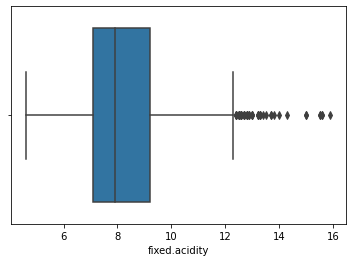

In [7]:
# plotting fixed.acidity variable
ax = sns.boxplot(x=df["fixed.acidity"]);

In [8]:
# printing skewness and kurtosis
skewness = df["fixed.acidity"].skew()
kurtosis = df["fixed.acidity"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.98, kurtosis is 1.13


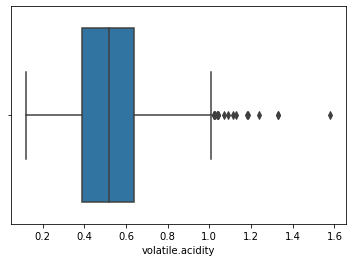

In [9]:
# plotting volatile.acidity variable
ax = sns.boxplot(x=df["volatile.acidity"]);

In [10]:
# printing skewness and kurtosis
skewness = df["volatile.acidity"].skew()
kurtosis = df["volatile.acidity"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.67, kurtosis is 1.23


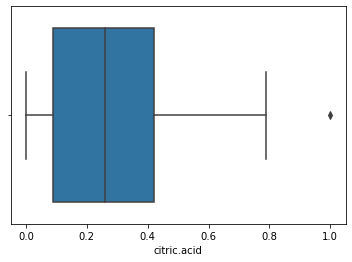

In [11]:
# plotting citric.acid variable
ax = sns.boxplot(x=df["citric.acid"]);

In [12]:
# printing skewness and kurtosis
skewness = df["citric.acid"].skew()
kurtosis = df["citric.acid"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.32, kurtosis is -0.79


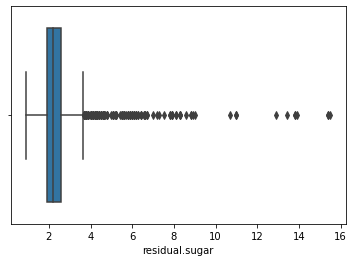

In [13]:
# plotting residual.sugar variable
ax = sns.boxplot(x=df["residual.sugar"]);

In [14]:
# printing skewness and kurtosis
skewness = df["residual.sugar"].skew()
kurtosis = df["residual.sugar"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 4.54, kurtosis is 28.62


In [15]:
# residual.sugar distribution is highly skewed
# trying log transformation to improve the skewness
log_residual_sugar_skewness = np.log(df["residual.sugar"]).skew()
log_residual_sugar_skewness

1.8068638195807207

In [16]:
# creating log(residual.sugar) column
df["log(residual.sugar)"] = np.log(df['residual.sugar'])

In [17]:
# removing residual.sugar column
df.drop(["residual.sugar"], axis=1, inplace=True)

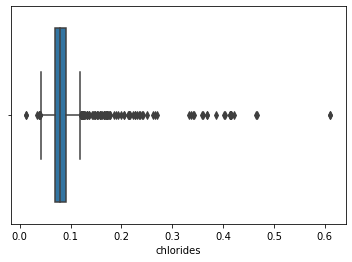

In [18]:
# plotting chlorides variable
ax = sns.boxplot(x=df["chlorides"]);

In [19]:
# printing skewness and kurtosis
skewness = df["chlorides"].skew()
kurtosis = df["chlorides"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 5.68, kurtosis is 41.72


In [20]:
# chlorides distribution is highly skewed
# trying log transformation to improve the skewness
log_chlorides_skewness = np.log(df["chlorides"]).skew()
log_chlorides_skewness

1.745215442685683

In [21]:
# creating log(chlorides) column
df["log(chlorides)"] = np.sqrt(df['chlorides'])

In [22]:
# removing chlorides column
df.drop(["chlorides"], axis=1, inplace=True)

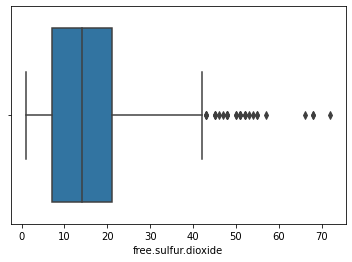

In [23]:
# plotting free.sulfur.dioxide variable
ax = sns.boxplot(x=df["free.sulfur.dioxide"]);

In [24]:
# printing skewness and kurtosis
skewness = df["free.sulfur.dioxide"].skew()
kurtosis = df["free.sulfur.dioxide"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 1.25, kurtosis is 2.02


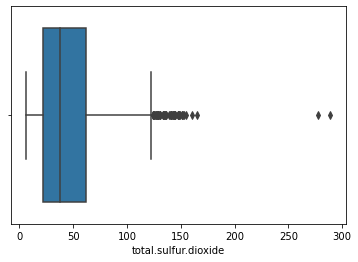

In [25]:
# plotting total.sulfur.dioxide variable
ax = sns.boxplot(x=df["total.sulfur.dioxide"]);

In [26]:
# printing skewness and kurtosis
skewness = df["total.sulfur.dioxide"].skew()
kurtosis = df["total.sulfur.dioxide"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 1.52, kurtosis is 3.81


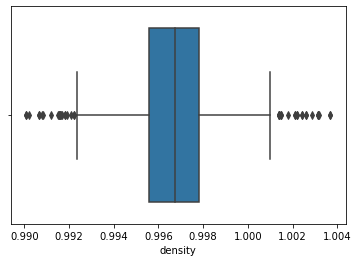

In [27]:
# plotting density variable
ax = sns.boxplot(x=df["density"]);

In [28]:
# printing skewness and kurtosis
skewness = df["density"].skew()
kurtosis = df["density"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.07, kurtosis is 0.93


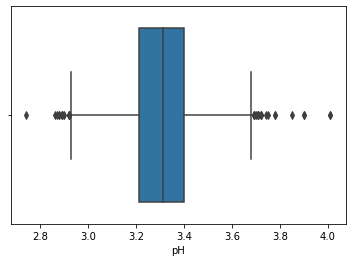

In [29]:
# plotting pH variable
ax = sns.boxplot(x=df["pH"]);

In [30]:
# printing skewness and kurtosis
skewness = df["pH"].skew()
kurtosis = df["pH"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.19, kurtosis is 0.81


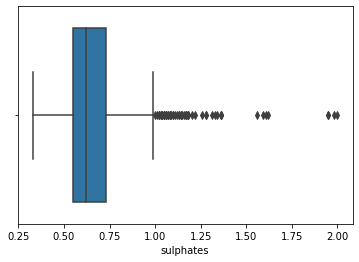

In [31]:
# plotting sulphates variable
ax = sns.boxplot(x=df["sulphates"]);

In [32]:
# printing skewness and kurtosis
skewness = df["sulphates"].skew()
kurtosis = df["sulphates"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 2.43, kurtosis is 11.72


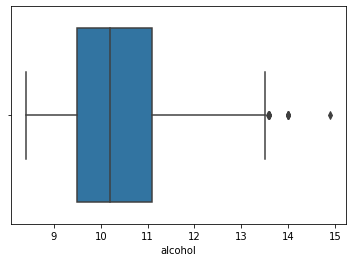

In [33]:
# plotting alcohol variable
ax = sns.boxplot(x=df["alcohol"]);

In [34]:
# printing skewness and kurtosis
skewness = df["alcohol"].skew()
kurtosis = df["alcohol"].kurtosis()
print("skewnessis {:.2f}, kurtosis is {:.2f}".format(skewness, kurtosis))

skewnessis 0.86, kurtosis is 0.20


C:\Users\artem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


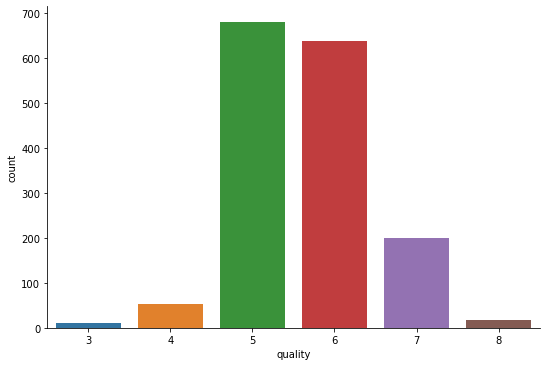

In [35]:
# plotting quality variable
ax = sns.catplot("quality", data=df, kind='count', aspect=1.5);

In [36]:
# counting all the values of categorical dependent variable quality
df["quality"].value_counts(dropna=False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [37]:
# showing the column names
list(df.columns)

['fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'log(residual.sugar)',
 'log(chlorides)']

In [38]:
# reordering the dataframe columns in original order
df = df[['fixed.acidity',
 'volatile.acidity',
 'citric.acid',
 'log(residual.sugar)',
 'log(chlorides)',
 'free.sulfur.dioxide',
 'total.sulfur.dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']]

In [39]:
# calculating a correlation matrix
corr_matrix = df.corr()

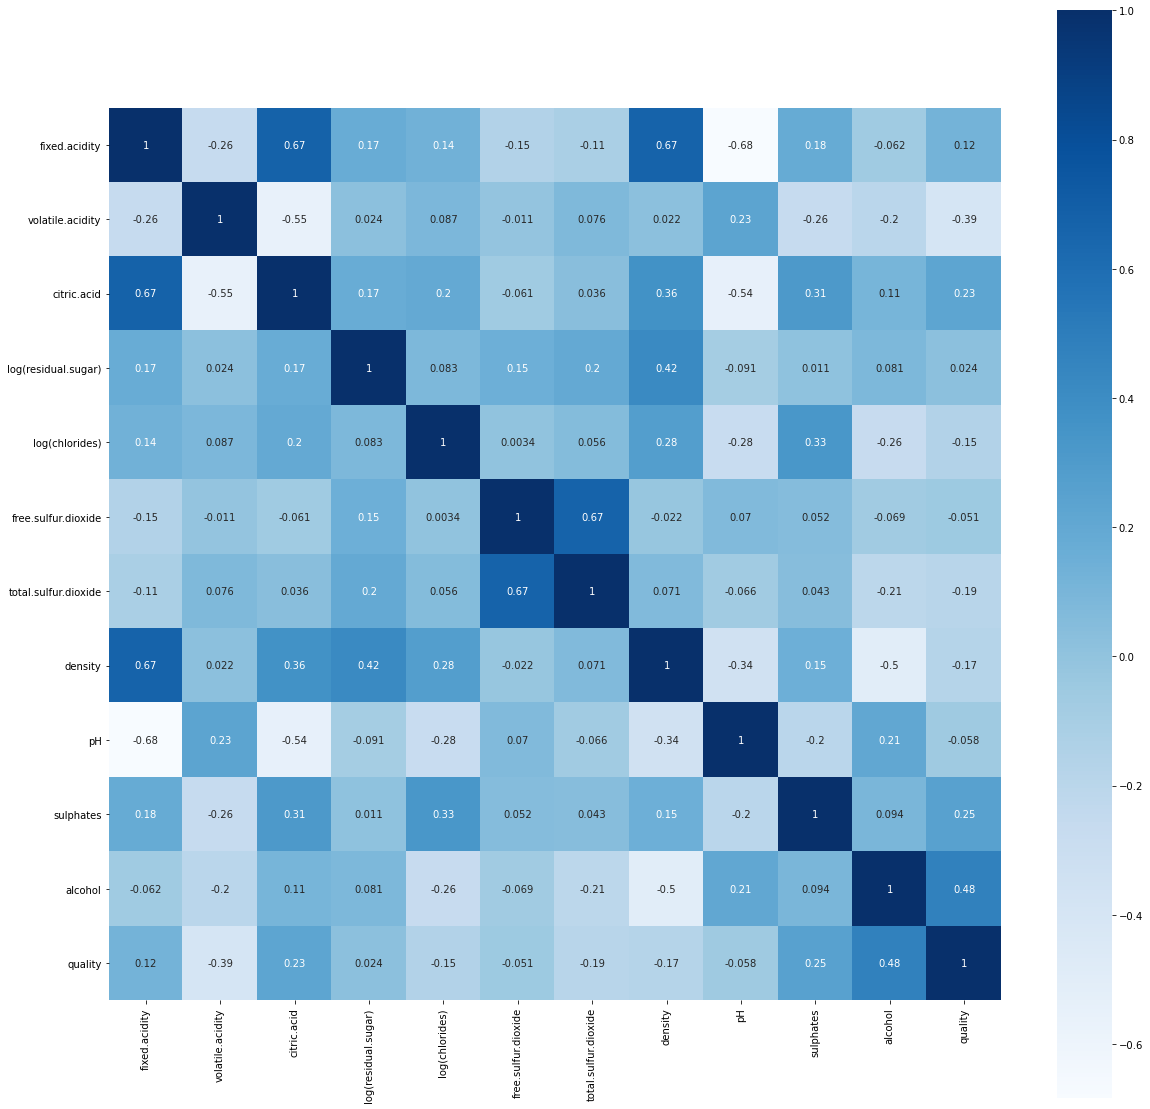

In [40]:
# drawing a heatmap
plt.figure(figsize = (20,20))
ax = sns.heatmap(corr_matrix, annot=True, square=True, cmap='Blues')
plt.show()

Discussion: density is correlated with residual.sugar and alcohol.

Discussion: variables log(residual.sugar) and pH have futile influence on the quality

# White wines: STEP 2: Random Forest Classification w/o pipeline optimization

In [41]:
# defining variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [42]:
# splitting the dataset to a train and a test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
# training the  model on the training set
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [44]:
# predicting y_test
y_pred = classifier.predict(X_test)

In [45]:
# making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy score: {:.2f} %".format(accuracy_score(y_test, y_pred)))

[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 99 31  0  0]
 [ 0  1 31 90  9  1]
 [ 0  0  0 19 22  1]
 [ 0  0  0  0  5  0]]
Accuracy score: 0.66 %


Accuracy score: 0.66 %


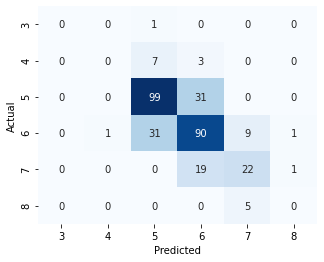

In [46]:
# making the confusion matrix
cm = confusion_matrix(y_test, y_pred)

index=["3", "4", "5", "6", "7", "8"]
columns=["3", "4", "5", "6", "7", "8"]

df_cm = pd.DataFrame(data=cm, index=index, columns=columns)
plt.figure(figsize=(5,4))

ax = sns.heatmap(df_cm, annot=True, fmt=".0f", cmap='Blues', cbar=False)

plt.xlabel('Predicted')
plt.ylabel('Actual')


print("Accuracy score: {:.2f} %".format(accuracy_score(y_test, y_pred)))

In [47]:
# applying k-fold cross validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Users\artem\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Accuracy: 69.83 %
Standard Deviation: 3.94 %


In [48]:
# comparing accuracy of training set and test set
print("Training set score: {:.2f} %".format(classifier.score(X_train,y_train)))
print("Test set score: {:.2f} %".format(classifier.score(X_test,y_test)))

Training set score: 1.00 %
Test set score: 0.66 %


Discussion: the overfitting seems to be caused by subjectiveness of the quality criteria.

# White wines: STEP 3: Random Forest Classification with pipeline optimization

Setting up a pipeline

In [49]:
pipe = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', RandomForestClassifier())
])

In [50]:
pipe.fit(X_train, y_train)

print("Training set score: {:.2f} %".format(pipe.score(X_train,y_train)))
print("Test set score: {:.2f} %".format(pipe.score(X_test,y_test)))

Training set score: 1.00 %
Test set score: 0.65 %


Optimizing and tuning the pipeline

In [51]:
parameters = {'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],
              'selector__threshold': [0, 0.001, 0.01],
#              'classifier__bootstrap': [True, False],
#              'classifier__max_depth': [5, 8, 15, 25, 30, None],
#              'classifier__max_features': ['auto', 'sqrt'],
#              'classifier__min_samples_leaf': [1, 2, 5, 10],
#              'classifier__min_samples_split': [2, 5, 10, 15, 100],
              'classifier__n_estimators': [100, 300, 500, 800, 1200]
             }

In [52]:
grid = GridSearchCV(pipe, parameters, cv=2).fit(X_train, y_train)

print("Training set score: {:.2f} %".format(grid.score(X_train,y_train)))
print("Test set score: {:.2f} %".format(grid.score(X_test,y_test)))

Training set score: 1.00 %
Test set score: 0.66 %


Analyzing the results

In [53]:
# Access the best set of parameters
best_params = grid.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier__n_estimators': 500, 'scaler': MaxAbsScaler(), 'selector__threshold': 0}
Pipeline(steps=[('scaler', MaxAbsScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('classifier', RandomForestClassifier(n_estimators=500))])


In [54]:
result_df = DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__n_estimators', 'param_scaler',
       'param_selector__threshold', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


Conclusion: partial parametric optimization gave accuracy of 66%.